In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import cheyette as ch

plt.style.use('input/qulib.mplstyle')

# PDE vs Analytic

In [2]:
curve = ch.FlatCurve(short_rate=0.01)
process = ch.VasicekProcess(mean_rev=0.01, local_vol=0.02)

strike = 0.01
expiry = 1.0
tenor = 10.0
frequency = ch.Frequency.Annually
product = ch.PayerSwaption(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)

valuation_time = 0.0
model_pde = ch.CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=5, y_freq=20, t_freq=10,
                    stepping_method=ch.PeacemanRachford(),
                    x_lower_bc=ch.DirichletIntrinsicBC(), x_upper_bc=ch.DirichletIntrinsicBC(),
                    y_lower_bc=ch.DirichletIntrinsicBC(), y_upper_bc=ch.DirichletIntrinsicBC())
model_analytic = ch.CheyetteAnalyticModel()

pricer_pde = ch.CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = ch.CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)

pv_pde = pricer_pde.price()['PV']
pv_analytic = pricer_analytic.price()['PV']

print('Forward Swap Rate:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

Forward Swap Rate: 0.01
PV PDE: 716.942951475514
PV Analytic: 717.2405366448545
Abs. Error: -0.29758516934055024


In [3]:
short_rates = np.arange(-0.05, 0.0501, 0.0025)
curves = [ch.FlatCurve(r) for r in short_rates]

pvs_curve_pde = [pricer_pde.set_curve(x).price()['PV'] for x in curves]
pvs_curve_analytic = [pricer_analytic.set_curve(x).price()['PV'] for x in curves]

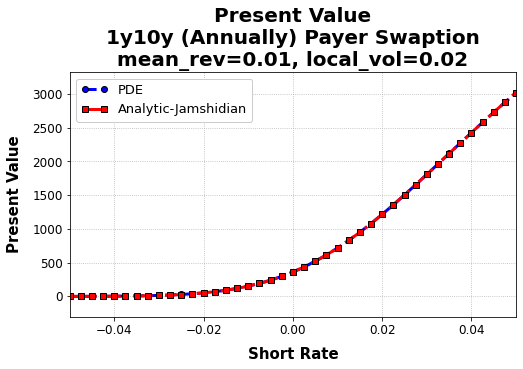

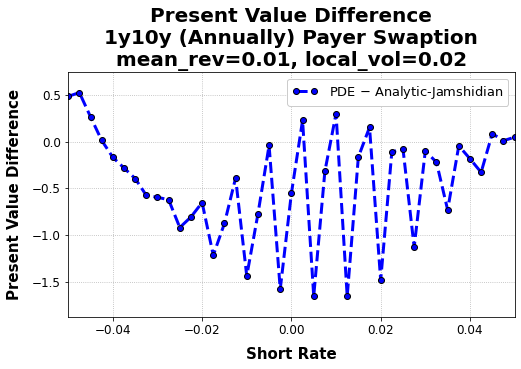

In [4]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()

In [6]:
curve = ch.FlatCurve(short_rate=0.01)
process = ch.VasicekProcess(mean_rev=0.01, local_vol=0.02)

strike = 0.01
expiry = 10.0
tenor = 1.0
frequency = ch.Frequency.Annually
product = ch.PayerSwaption(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)

valuation_time = 0.0

model_pde = ch.CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=2.0,
                    x_freq=5, y_freq=20, t_freq=10,
                    stepping_method=ch.PeacemanRachford(),
                    x_lower_bc=ch.DirichletIntrinsicBC(), x_upper_bc=ch.DirichletIntrinsicBC(),
                    y_lower_bc=ch.DirichletIntrinsicBC(), y_upper_bc=ch.DirichletIntrinsicBC())
model_analytic = ch.CheyetteAnalyticModel()

pricer_pde = ch.CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = ch.CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)

pv_pde = pricer_pde.price()['PV']
pv_analytic = pricer_analytic.price()['PV']

print('Forward Swap Rate:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

Forward Swap Rate: 0.01
PV PDE: 216.23463320892634
PV Analytic: 216.4518881097109
Abs. Error: -0.21725490078455323


In [8]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [ch.FlatCurve(r) for r in short_rates]

pvs_curve_pde = [pricer_pde.set_curve(x).price()['PV'] for x in curves]
pvs_curve_analytic = [pricer_analytic.set_curve(x).price()['PV'] for x in curves]

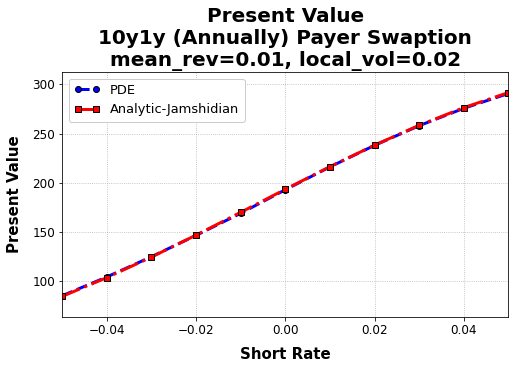

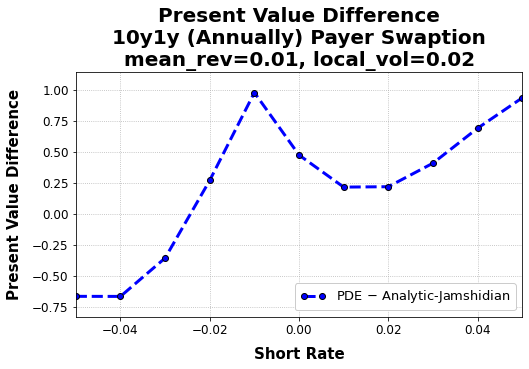

In [9]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()

In [11]:
import cProfile
from time import time

curve = ch.FlatCurve(short_rate=0.01)
process = ch.VasicekProcess(mean_rev=0.01, local_vol=0.02)

strike = 0.01
expiry = 10.0
tenor = 10.0
frequency = ch.Frequency.Annually
product = ch.PayerSwaption(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)

valuation_time = 0.0

model_pde = ch.CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=30, y_freq=30, t_freq=10,
                    stepping_method=ch.PeacemanRachford(),
                    x_lower_bc=ch.DirichletIntrinsicBC(), x_upper_bc=ch.DirichletIntrinsicBC(),
                    y_lower_bc=ch.DirichletIntrinsicBC(), y_upper_bc=ch.DirichletIntrinsicBC())
model_analytic = ch.CheyetteAnalyticModel()

pricer_pde = ch.CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = ch.CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)


start = time()
#cProfile.run("pv_pde = pricer_pde.price()['PV']*notional", sort='tottime')
pv_pde = pricer_pde.price()['PV']
print('Elapsed: ', time() - start)

pv_analytic = pricer_analytic.price()['PV']

print('Strike:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

# Boundary conditions are computationally expensive

x_steps = 2 * model_pde.x_freq * model_pde.x_grid_stddevs
y_steps = 2 * model_pde.y_freq * model_pde.y_grid_stddevs
t_steps = product.expiry * model_pde.t_freq
print('\nGridSize')
print(f' x_steps: {x_steps}')
print(f' y_steps: {y_steps}')
print(f' t_steps: {t_steps}')
print(f'--------')
print(f' nodes: {x_steps*y_steps*t_steps:.1e}')

Elapsed:  1.8433001041412354
Strike: 0.01
PV PDE: 1954.9019339719764
PV Analytic: 1955.7688638986265
Abs. Error: -0.866929926650073

GridSize
 x_steps: 180.0
 y_steps: 60.0
 t_steps: 100.0
--------
 nodes: 1.1e+06


In [12]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [ch.FlatCurve(r) for r in short_rates]

pvs_curve_pde = [pricer_pde.set_curve(x).price()['PV'] for x in curves]
pvs_curve_analytic = [pricer_analytic.set_curve(x).price()['PV'] for x in curves]

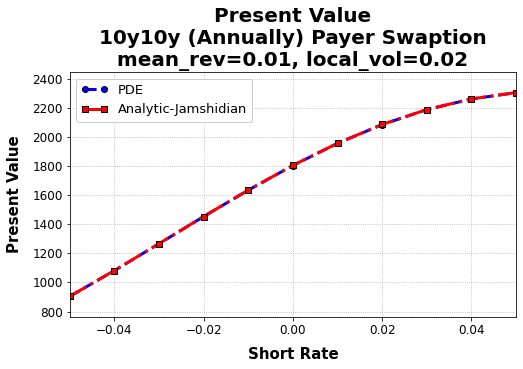

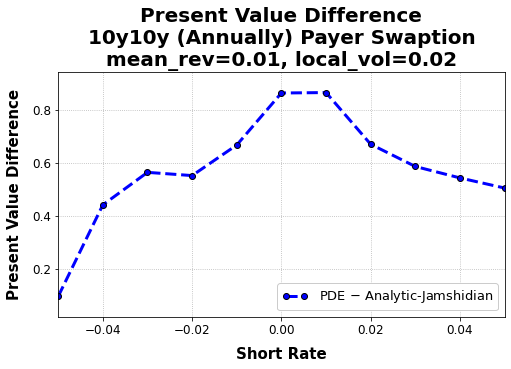

In [13]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()